# Importación de librerías

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import re # Expresiones regulares
from sklearn import preprocessing # LabelEncoder

In [2]:
data = pd.read_table("../Dataset/labeledEligibilitySample10k.csv", header = None)

In [3]:
print(data.shape)

(10000, 1)


### Se transforma la variable elegible (la salida) en 0 y 1

In [4]:
clin_trial = pd.DataFrame(np.array(data).reshape(10000,1), columns=['Description'])
clin_trial[:].head(10)

,Description
0,"18518,__label__0,study interventions are Erlot..."
1,"71331,__label__0,study interventions are Antib..."
2,"232342,__label__0,study interventions are Cycl..."
3,"450677,__label__0,study interventions are Pred..."
4,"410008,__label__0,study interventions are Inte..."
5,"307723,__label__0,study interventions are Erlo..."
6,"378773,__label__0,study interventions are Phar..."
7,"479580,__label__0,study interventions are Myco..."
8,"458795,__label__0,study interventions are gamm..."
9,"366518,__label__0,study interventions are Succ..."


In [5]:
clin_trial['Num'], clin_trial['ExtraPart'] = clin_trial['Description'].str.split(',', 1).str
clin_trial=clin_trial.drop(['Num'], axis=1)

clin_trial['Label'], clin_trial['TrashPart'] = clin_trial['ExtraPart'].str.split(',', 1).str
clin_trial['Eligible'] = clin_trial['Label'].str.extract('(\d)', expand=True)
clin_trial=clin_trial.drop(['Label'], axis=1)
clin_trial=clin_trial.drop(['ExtraPart'], axis=1)

clin_trial['Interventions'], clin_trial['Diagnoses'] = clin_trial['TrashPart'].str.split('.', 1).str
clin_trial=clin_trial.drop(['TrashPart'], axis=1)

clin_trial=clin_trial.drop(['Description'], axis=1)

clin_trial.head(10)

,Eligible,Interventions,Diagnoses
0,0,study interventions are Erlotinib Hydrochloride,recurrent midline lethal granuloma of the par...
1,0,study interventions are Antibodies,fallopian tube cancer diagnosis and periphera...
2,0,study interventions are Cyclosporine,recurrent adult diffuse mixed cell lymphoma d...
3,0,study interventions are Prednisolone phosphate,childhood immunoblastic large cell lymphoma d...
4,0,study interventions are Interferon-alpha,stage multiple myeloma diagnosis and serum pr...
5,0,study interventions are Erlotinib Hydrochloride,patients must have carcinoma of unknown prima...
6,0,study interventions are Pharmacological Study,hepatoblastoma diagnosis and two weeks must h...
7,0,study interventions are Mycophenolic Acid,recurrent grade one follicular lymphoma diagn...
8,0,study interventions are gamma-secretase/Notch ...,recurrent non small cell lung cancer diagnosi...
9,0,study interventions are Succinylcholine,untreated childhood medulloblastoma diagnosis...


In [6]:
# Se quita study interventions are puesto que está en todas las muestras de la varialbe Interventions
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace("study interventions are\s", "")
clin_trial.sample(10)

,Eligible,Interventions,Diagnoses
2953,0,"""Dacarbazine of 850 mg/m2, or 1,000 mg/m2, or ...",soft tissue sarcoma diagnosis and adequate bo...
7590,1,Assess bulge at 1 year postoperatively,fibromatosis abdominal diagnosis and patients...
2317,0,Antibodies,ovarian cancer diagnosis and subjects will be...
2087,0,Levoleucovorin,stage iia pancreatic cancer diagnosis and all...
3016,0,Antibodies,metastatic cancer diagnosis and see disease c...
2191,0,Immunoglobulins,recurrent ewing sarcoma peripheral primitive ...
7123,1,Everolimus,breast cancer diagnosis and radiotherapy with...
5745,1,quality-of-life assessment,recurrent squamous cell carcinoma of the naso...
7048,1,Everolimus,advanced persistent or recurrent endometrial ...
4704,0,Fludarabine,lymphoma diagnosis and endocrine therapy;


In [7]:
#Sirve para buscar palabras con esos caracteres

# for name in list(clin_trial.columns):
#     for sample in clin_trial[name]:
#         if re.findall('[+=*^#áÁéÉíÍóÓúÚ\[\]\$,.;:!@¡¿?\{\}\&`~\^\(\)|%_\-<>\'\"]', sample):
#             print(sample, "\n") ## Funciona para detectar caracteres especiales

In [8]:
# Se transforma todo a minúsculas
clin_trial['Interventions'] = clin_trial['Interventions'].str.lower() ##Todo a minúscula
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.lower()     ##Todo a minúscula

#Se reemplazan vocales con tildes en ambas variables
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[áäâà]', 'a', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[éêèë]', 'e', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[íïìî]', 'i', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[óôòö]', 'o', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[úûùü]', 'u', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('["]', '', regex=True)

clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[áäâà]', 'a', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[éêèë]', 'e', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[íïìî]', 'i', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[óôòö]', 'o', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[úûùü]', 'u', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('^\s', '', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('["]', '', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[;]', '', regex=True)



#clin_trial.sample(10)

In [9]:
# Total de categorías diferentes en la variable Interventions
len(np.unique(clin_trial['Interventions'])) 

1426

In [10]:
# Sirve para ver cuantos datos hay por categoría de interventions

datosInt = clin_trial['Interventions'].value_counts()

In [11]:
# Total de categorías diferentes en la variable Diagnoses
len(np.unique(clin_trial['Diagnoses']))

9786

In [12]:
datosDiag = clin_trial['Diagnoses'].value_counts() 
#datosDiag

## Codificación de la variable Interventions

In [13]:
labels = np.unique(clin_trial['Interventions'])

lb_interventions = preprocessing.LabelEncoder()
lb_interventions.fit(labels)
clin_trial['Interventions'] = lb_interventions.transform(clin_trial['Interventions']) 

In [14]:
clin_trial

,Eligible,Interventions,Diagnoses
0,0,464,recurrent midline lethal granuloma of the para...
1,0,101,fallopian tube cancer diagnosis and peripheral...
2,0,349,recurrent adult diffuse mixed cell lymphoma di...
3,0,1052,childhood immunoblastic large cell lymphoma di...
4,0,708,stage multiple myeloma diagnosis and serum pro...
...,...,...,...
9995,1,1109,prostate neoplasms diagnosis and if brain imag...
9996,1,200,multiple myeloma diagnosis and any condition i...
9997,1,1201,lung carcinoid tumor diagnosis and patients wh...
9998,1,939,stage iv colorectal cancer diagnosis and serio...


# Remover Stop Words

## Preliminares

In [15]:
# Se carga la libreria
from nltk.corpus import stopwords

# Se debe descargar el conjunto de 'Stop Words' la primera vez
import nltk
nltk.download('stopwords')

#Se carga la librería de lematización
#PONER conda install -c conda-forge spacy EN ANACONDA PROMPT
# Y python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")

#Se carga la librería de lematización
import spacy
nlp = spacy.load("en_core_web_sm")

#Se carga la librería de stemming y se inicializa el stemmer
import nltk
from nltk import SnowballStemmer
stemmer=SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Crear las palabras Token

## Lematización

"Dada una forma flexionada (es decir, en plural, en femenino, conjugada, etc), hallar el lema correspondiente. El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra. Es decir, el lema de una palabra es la palabra que nos encontraríamos como entrada en un diccionario tradicional: singular para sustantivos, masculino singular para adjetivos, infinitivo para verbos." -Wikipedia

In [16]:
#https://medium.com/qu4nt/reducir-el-número-de-palabras-de-un-texto-lematización-y-radicalización-stemming-con-python-965bfd0c69fa
toks = []

for sample in clin_trial['Diagnoses']:
    words = nlp(sample)
    lemma = [tok.lemma_.lower() for tok in words]
    #print(lemma)
    toks.append(lemma)
    

## Cargar las Stop Words

In [17]:
# Carga las Stop Words en inglés
stop_words = stopwords.words('english')

## Estaría bien revisar este conjunto 'english'. Pero supongo que es el más útil para nuestro caso también.
# Imprime algunas Stop Words
#stop_words[:100]

## Remover las Stop Words

In [18]:
tokens = []
for tok in toks:
    clean_word = [word for word in tok if word not in stop_words]
    tokens.append(clean_word)

## Stemming

"Es un método para reducir una palabra a su raíz o (en inglés) a un stem." - Wikipedia

In [19]:
stemms = []
for tok in tokens:
    var = [stemmer.stem(token) for token in tok]
    stemms.append(var)

In [20]:
##http://www.insightsbot.com/bag-of-words-algorithm-in-python-introduction/

def extract_words(sentence):
    words = []
    for i in sentence:
        if i not in words:
            words.append(i)
    return words

def getAll_words(data):
    words = []
    for i in data:
        wordsPerSentence = extract_words(i)
        for j in wordsPerSentence:
            if j not in words:
                words.append(j)
    return words

def wordFrequency(sentence, words):
    sentence_words = sentence
    # frequency word count
    bag = np.zeros(len(words))
    for sw in sentence_words:
        for i,word in enumerate(words):
            if word == sw: 
                bag[i] += 1
                
    return np.array(bag)

def bagOfWords(data, words):
    bow = []
    for i in data:
        freq = wordFrequency(i, words)
        bow.append(freq)
    return bow

In [21]:
words = getAll_words(stemms)
bow = bagOfWords(stemms, words)

In [22]:
bowArray = np.asarray(bow)
wordsArray = np.asarray(words)
df = pd.DataFrame(data=bowArray, columns= wordsArray)

In [23]:
df

,recurr,midlin,lethal,granuloma,paranas,sinus,nasal,caviti,diagnosi,protein,...,kaposiform_hemangioendothelioma,khe,damag,peroxid,color,bleach,streak,perm,relax,oxid
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Ordenar y eliminar palabras

In [24]:
import operator

bowDict = {}

for column in df:
    bowDict[column] = df[column].sum()

bowDict_sort = sorted(bowDict.items(), key=operator.itemgetter(1), reverse=True)

# print(bowDict_sort)

In [25]:
bowDict_sort2 = bowDict_sort
for word in bowDict_sort2:
    if word[1]>3400: #Para eliminar con un umbral
        bowDict_sort2.remove(word) 

# Concatenación de dfs

In [26]:
del clin_trial['Diagnoses']
clin_trial_full = pd.concat([clin_trial, df], axis=1)
clin_trial_full

,Eligible,Interventions,recurr,midlin,lethal,granuloma,paranas,sinus,nasal,caviti,...,kaposiform_hemangioendothelioma,khe,damag,peroxid,color,bleach,streak,perm,relax,oxid
0,0,464,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,349,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,1,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,1,1201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,1,939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Guardado del modelo

In [47]:
clin_trial_full.to_hdf('bagOfWords10k.h5', key = 'clin_trial')

In [ ]:
df_loaded = pd.read_hdf('bagOfWords10k.h5', 'clin_trial')

In [ ]:
df_loaded

# Algoritmos de clasificación

In [27]:
clin_trial_values = clin_trial_full.values
Y = clin_trial_values[:, 0]
Y = Y.astype(int)
X = clin_trial_values[:, 1:]

In [28]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

# Naive Bayes

In [31]:
from sklearn.preprocessing import MinMaxScaler # Escala los datos
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot as skplt 
from string import ascii_uppercase 
# import seaborn as sns
import qgrid
import time
from sklearn.externals import joblib # Para guardar el modelo

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
def model_NB(impresion = False):

    tiempo_i = time.time()

    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    nb = GaussianNB()
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)

        nb.fit(Xtrain, Ytrain)
        pred = nb.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_
                
        errores[j] = classification_error(pred, Ytest)
          
    if impresion == True:
        j = 0
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)

Eficiencia 0.6265999999999999  Int_Eficiencia 0.005546169849544829  Sensibilidad 0.6231878709996861  Int_Sensibilidad 0.27216403937943906  Precision 0.6757948928744846  Int_Precision 0.09020332929990038  F-Score 0.5948072696992559  Int_F-Score 0.11392068102778098  Error_Prueba 0.3734  Int_Error 0.005546169849544805  Tiempo ejecución 55.179187536239624


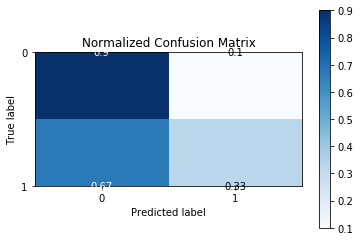

In [34]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_NB(impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

In [ ]:
# joblib.dump(nb, 'naive_bayes.pkl') # Guardo el modelo.

# Logistic Regression

In [35]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

In [39]:
def LRC(c, slv, impresion = False):

    tiempo_i = time.time()
    
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    LR = LogisticRegression(C=c, solver=slv, max_iter = 200, n_jobs = -1)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        LR.fit(Xtrain, Ytrain)
        pred = LR.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_

                
        errores[j] = classification_error(pred, Ytest)
           
    if impresion == True:
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)

Eficiencia 0.7877000000000001  Int_Eficiencia 0.009795407086997455  Sensibilidad 0.787700615196418  Int_Sensibilidad 0.01584694518212004  Precision 0.7877929355573673  Int_Precision 0.014238274082940327  F-Score 0.7876070105427935  Int_F-Score 0.01081477259425069  Error_Prueba 0.2123  Int_Error 0.009795407086997459  Tiempo ejecución 52.0675745010376


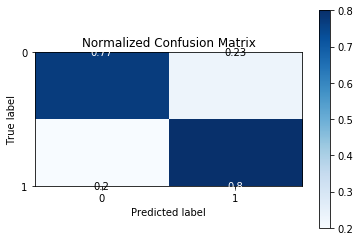

In [43]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = LRC(1, 'liblinear', impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

In [41]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'Tipo de solver' : pd.Series(['newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 
                          'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 
                          'liblinear', 'liblinear', 'liblinear','liblinear','liblinear','liblinear',
                          'sag','sag','sag','sag','sag','sag',
                          'saga','saga','saga','saga','saga','saga']),
    'Valor de regularización' : pd.Series([0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Tipo de solver', 'Valor de regularización'], inplace=True)

i = 0
for k, n in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = LRC(n, k, impresion = False)
    df_types["Eficiencia"][i] = Acc
    df_types["Int_Eficiencia"][i] = IntAcc
    df_types["Sensibilidad"][i] = Sen
    df_types["Int_Sensibilidad"][i] = IntSen
    df_types["Precision"][i] = Pre
    df_types["Int_Precision"][i] = IntPre
    df_types["F-Score"][i] = f
    df_types["Int_F-Score"][i] = IntF
    df_types["Error_Prueba"][i] = error
    df_types["Int_error"][i] = stdError
    df_types["Tiempo de ejecución"][i] = tiempo
    
    i += 1
    
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [42]:
qgrid_widget.get_changed_df()

Eficiencia  \
Tipo de solver Valor de regularización                       
newton-cg      0.01                                 0.7548   
               0.10                                  0.776   
               0.50                                 0.7942   
               1.00                                 0.7859   
               1.50                                  0.789   
               2.00                                 0.7915   
lbfgs          0.01                                 0.7532   
               0.10                                  0.774   
               0.50                                 0.7853   
               1.00                     0.7976999999999999   
               1.50                                 0.8003   
               2.00                     0.7932999999999999   
liblinear      0.01                                  0.752   
               0.10                                 0.7834   
               0.50                     0.7957000000000001   
               1.00                     0.7994000000000001   
               1.50                     0.7938000000000001   
               2.00                                  0.793   
sag            0.01                     0.7525999999999999   
               0.10                                 0.7745   
               0.50                                 0.7873   
               1.00                     0.7897000000000001   
               1.50                                 0.7917   
               2.00                     0.7872999999999999   
saga           0.01                                 0.7679   
               0.10                                 0.7759   
               0.50                                 0.7879   
               1.00                     0.7886000000000001   
               1.50                     0.7877000000000001   
               2.00                                 0.7862   

                                               Int_Eficiencia  \
Tipo de solver Valor de regularización                          
newton-cg      0.01                      0.005161395160225569   
               0.10                       0.00889044430835719   
               0.50                     0.0049112116631234715   
               1.00                      0.008710338684574792   
               1.50                     0.0032186953878862172   
               2.00                      0.011857065404222086   
lbfgs          0.01                       0.00882269800004512   
               0.10                      0.008143709228600941   
               0.50                       0.01014051280754578   
               1.00                     0.0018411952639521734   
               1.50                     0.0035142566781611365   
               2.00                      0.009783148777362036   
liblinear      0.01                      0.005926212956011632   
               0.10                      0.005039841267341673   
               0.50                      0.005975784467331484   
               1.00                      0.005582114294781142   
               1.50                      0.008847598544237863   
               2.00                      0.006365532185135816   
sag            0.01                     0.0036055512754639956   
               0.10                     0.0036152454965050493   
               0.50                      0.004998999899979971   
               1.00                      0.006179805822192142   
               1.50                     0.0035369478367654433   
               2.00                      0.007591442550661898   
saga           0.01                     0.0024062418831032038   
               0.10                      0.002582634314029006   
               0.50                      0.004910193478876349   
               1.00                      0.008562709851443025   
               1.50                      0.005086255990411816   
               2.00                     0.002720

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier # Se llama a la librería del método Random Forest

In [47]:
def model_RF(estimadores, caracteristicas, impresion = False):
        
    tiempo_i = time.time()
    
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    
    RF = RandomForestClassifier(n_estimators=estimadores, max_features =caracteristicas, n_jobs = -1)
    
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        RF.fit(Xtrain, Ytrain)
        pred = RF.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_

        
        errores[j] = classification_error(pred, Ytest)
       
    
    if impresion == True:
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)
    

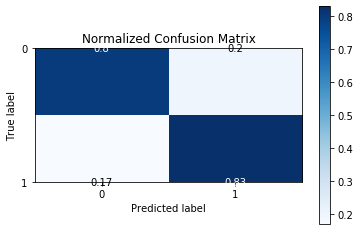

In [53]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(100, 50, impresion = True)

In [51]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,
                                     10,10,10,10,10,10,
                                     20,20,20,20,20,20,
                                     50,50,50,50,50,50,
                                     100,100,100,100,100,100]), 
    'Variables analizadas por nodo' : pd.Series([50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)

for n, k in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(n, k, impresion = False)
    df_types["Eficiencia"][n,k] = Acc
    df_types["Int_Eficiencia"][n,k] = IntAcc
    df_types["Sensibilidad"][n,k] = Sen
    df_types["Int_Sensibilidad"][n,k] = IntSen
    df_types["Precision"][n,k] = Pre
    df_types["Int_Precision"][n,k] = IntPre
    df_types["F-Score"][n,k] = f
    df_types["Int_F-Score"][n,k] = IntF
    df_types["Error_Prueba"][n,k] = error
    df_types["Int_error"][n,k] = stdError
    df_types["Tiempo de ejecución"][n,k] = tiempo


#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [52]:
qgrid_widget.get_changed_df()

Eficiencia  \
Numero de arboles Variables analizadas por nodo                       
5                 50                                          0.755   
                  100                                        0.7643   
                  250                                        0.7651   
                  500                                        0.7717   
                  750                                        0.7719   
                  1000                           0.7688999999999999   
10                50                                         0.7804   
                  100                                        0.7844   
                  250                                        0.7846   
                  500                                        0.7791   
                  750                                        0.7826   
                  1000                                       0.7847   
20                50                             0.7932000000000001   
                  100                            0.7950999999999999   
                  250                            0.7938000000000001   
                  500                                        0.7924   
                  750                            0.7943000000000001   
                  1000                                       0.7891   
50                50                                         0.8076   
                  100                                         0.812   
                  250                            0.8036000000000001   
                  500                                        0.8026   
                  750                                        0.8013   
                  1000                                        0.793   
100               50                                         0.8108   
                  100                                        0.8073   
                  250                            0.8028000000000001   
                  500                                        0.8031   
                  750                            0.7978000000000001   
                  1000                                       0.8007   

                                                        Int_Eficiencia  \
Numero de arboles Variables analizadas por nodo                          
5                 50                              0.006606057825965523   
                  100                             0.009856469956328164   
                  250                             0.008463450832845894   
                  500                            0.0066715815216483575   
                  750                            0.0023216373532487762   
                  1000                            0.006048966853934673   
10                50                              0.006957010852370417   
                  100                             0.011523888232710382   
                  250                            0.0041424630354415775   
                  500                            0.0047864391775097204   
                  750                             0.005340411969127481   
                  1000                            0.009171150418567996   
20                50                              0.009355212450821214   
                  100                             0.009153687781435438   
                  250                             0.004054626986542652   
                  500                             0.009810198774744596   
                  750                             0.005399073994677254   
                  1000                            0.008458723307923018   
50                50                              0.007812809993849852   
                  100                            0.0016970562748477105   
                  250                            0.0018973665961010292   
                  500                             0.011086929241228166   
        